In [32]:
from tqdm import tqdm
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np

In [34]:
scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True # set max width size for presenter view
scv.set_figure_params('scvelo') # for beautified visualization

In [45]:
# adata = scv.read('/icto/user/yc27616/data-home/Ptbp1/KPTracer-Data/KPTracer-Data/expression/adata_processed.nt.h5ad')
adata = sc.read_h5ad('/icto/user/yc27616/data-home/Ptbp1/KPTracer-Data/KPTracer-Data/expression/adata_processed.nt.h5ad')
adata

AnnData object with n_obs × n_vars = 58022 × 27998
    obs: 'TS_Present', 'RNA_Present', 'MULTI', 'TS_UMI', 'NUM_INTBC', 'Lane', 'Tumor', 'SubTumor', 'ES_clone', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'n_counts', 'leiden_sub', 'Cluster-Name'
    uns: 'Cluster-Name_colors', 'Lane_colors', 'leiden', 'leiden_colors', 'neighbors'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

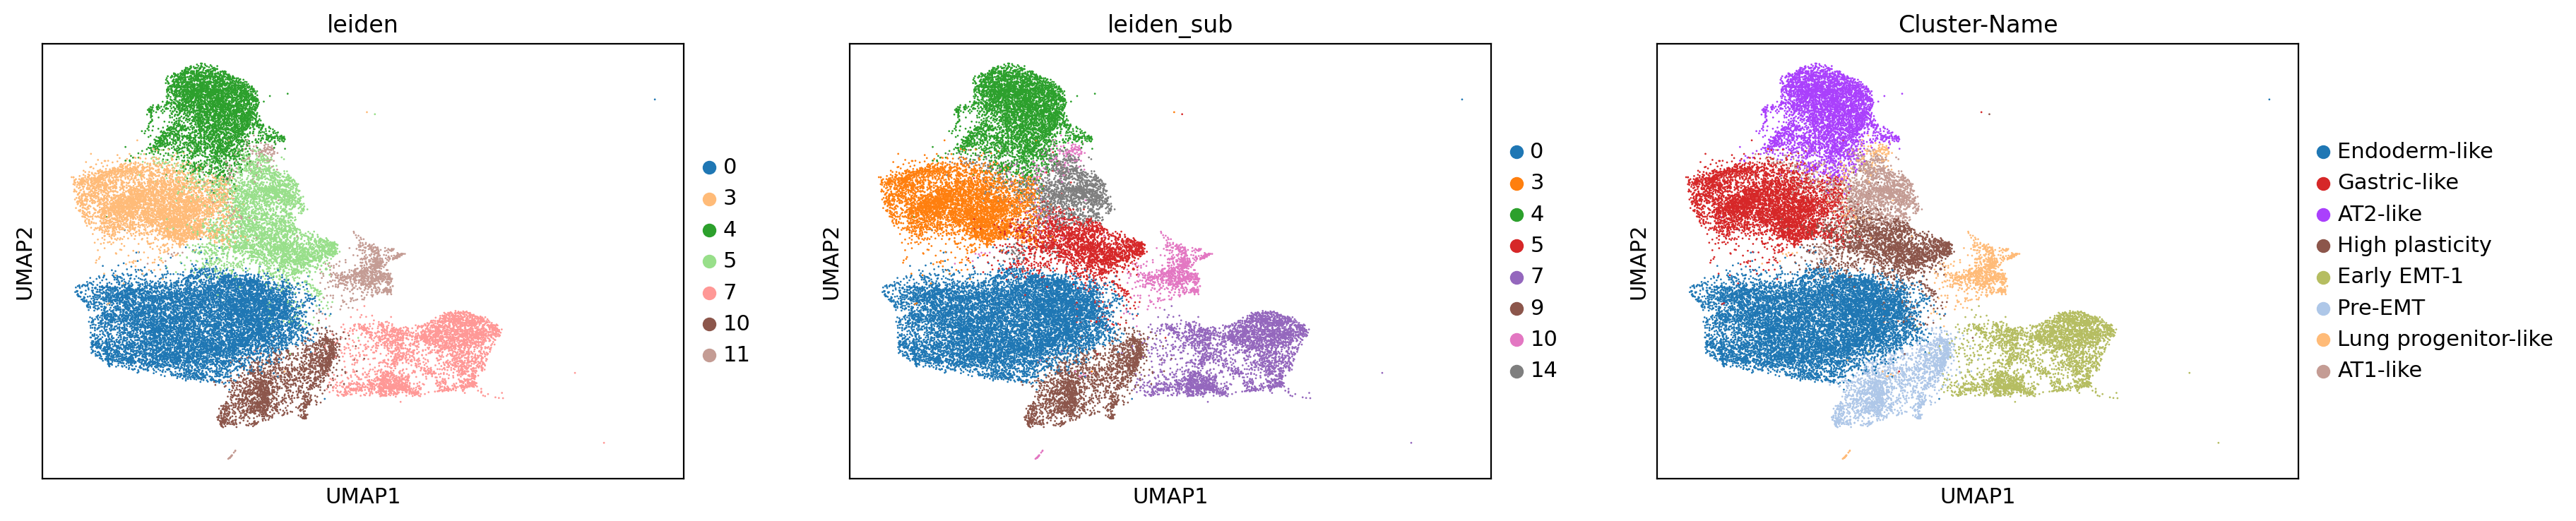

In [48]:
#提取细胞亚型
adata = adata[adata.obs['Cluster-Name'].isin([
    "AT2-like", "AT1-like", "Gastric-like", 
    "High plasticity", "Lung progenitor-like", 
    "Endoderm-like", "Early EMT-1", "Pre-EMT"
])]
#可视化
sc.pl.umap(adata, color=['leiden', 'leiden_sub',"Cluster-Name"])

In [49]:
adata.layers['spliced'] = adata.X.copy()  # Spliced as main matrix
adata.layers['unspliced'] = adata.X * 0.1  # Approximation for unspliced
adata

AnnData object with n_obs × n_vars = 30878 × 27998
    obs: 'TS_Present', 'RNA_Present', 'MULTI', 'TS_UMI', 'NUM_INTBC', 'Lane', 'Tumor', 'SubTumor', 'ES_clone', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'n_counts', 'leiden_sub', 'Cluster-Name'
    uns: 'Cluster-Name_colors', 'Lane_colors', 'leiden', 'leiden_colors', 'neighbors', 'leiden_sub_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

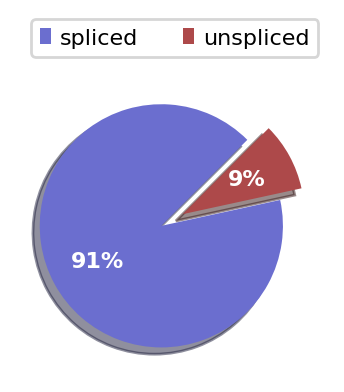

In [50]:
scv.pl.proportions(adata)

In [51]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
sc.pp.log1p(adata)

Filtered out 12687 genes that are detected 20 counts (shared).
Extracted 2000 highly variable genes.


In [52]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Extracted 2000 highly variable genes.
Logarithmized X.


/home/yc27616/miniconda3/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_132656/3334712381.py:2: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/home/yc27616/miniconda3/lib/python3.9/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/home/yc27616/miniconda3/lib/python3.9/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVel

computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [53]:
scv.tl.velocity(adata)

computing velocities


/home/yc27616/miniconda3/lib/python3.9/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:19) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [54]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/80 cores)


  0%|          | 0/30878 [00:00<?, ?cells/s]

In [55]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

In [56]:
scv.pl.velocity_embedding(adata, arrow_length=3, arrow_size=2, dpi=120)

In [57]:
scv.pl.velocity(adata, ['Cpe',  'Gnao1', 'Ins2', 'Adk'], ncols=2)

In [58]:
# cell_id = 'L28.ATCTACTTCTAAGCCA-1'
#cell_id = 'L6.CCCTCCTCAGCTGCTG-1'
#cell_id = 'L37.CGTTAGAAGAATGTGT-1'
#cell_id = 'L31.TCACAAGGTACAGCAG-1'
cell_id = 'L28.AGTGGGACACTGTCGG-1'

cell_idx = np.flatnonzero(adata.obs.index == cell_id)[0]
adata.uns['iroot'] = cell_idx

cell_idx

In [59]:
scv.tl.velocity_pseudotime(adata, root_key=cell_idx)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [60]:
adata

In [61]:
pseudotime_data = adata.obs.velocity_pseudotime

In [62]:
pseudotime_data.to_csv('../scvelo_pseudotime.L28.AGTGGGACACTGTCGG-1.3430.T2.csv')